<a href="https://colab.research.google.com/github/johyunkang/py_pandas/blob/main/excel_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas 를 이용한 엑셀 문서 편집 방법

### 1. 엑셀 문서를 불러오기 위한 구글 드라이브 마운트

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. 엑셀 파일 경로 설정

In [15]:
import pandas as pd
PATH = '/content/drive/MyDrive/colab/'

df = pd.read_excel(PATH + 'raw_file.xlsx')
df.head()

,name,bs_ymd,site_nm,site_nm1,site_nm2,cnt
0,손나은,20210222,samsung,samsung,NaN,1.0
1,성유리,20210222,hld,hld,NaN,1.0
2,현아,20210222,ksp,ksp,NaN,1.0
3,나연,20210222,bnk,bnk,NaN,1.0
4,다연,20210222,mg,mg,NaN,1.0


### 3. 문서 확인 및 편집

In [16]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      25 non-null     object 
 1   bs_ymd    25 non-null     int64  
 2   site_nm   25 non-null     object 
 3   site_nm1  25 non-null     object 
 4   site_nm2  4 non-null      object 
 5   cnt       25 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ KB


,bs_ymd,cnt
count,2.500000e+01,25.000000
mean,2.021022e+07,0.960000
std,8.164966e-01,0.138444
min,2.021022e+07,0.500000
25%,2.021022e+07,1.000000
50%,2.021022e+07,1.000000
75%,2.021022e+07,1.000000
max,2.021022e+07,1.000000


### 3.1 데이터프레임의 컬럼 타입 변경

In [17]:
df = df.astype({'bs_ymd':'object'})  # bs_ymd 컬럼 타입을 int > object 로 변경
#df.info()

df.head(5)

df_grp = df.groupby(by=['bs_ymd', 'name']).count()  # bs_ymd, name 컬럼 기준으로 group by
# df_grp.head(20)
df_grp = df_grp.reset_index(level=['bs_ymd', 'name']) # index 를 column 으로 변경
df.head(10)

,name,bs_ymd,site_nm,site_nm1,site_nm2,cnt
0,손나은,20210222,samsung,samsung,NaN,1.0
1,성유리,20210222,hld,hld,NaN,1.0
2,현아,20210222,ksp,ksp,NaN,1.0
3,나연,20210222,bnk,bnk,NaN,1.0
4,다연,20210222,mg,mg,NaN,1.0
5,아린,20210222,nps,nps,NaN,1.0
6,효리,20210222,lg,ksp,lg,1.0
7,아이유,20210222,nps,nps,NaN,1.0
8,손나은,20210223,samsung,samsung,NaN,1.0
9,성유리,20210223,kb,kb,NaN,1.0


## 3.2 DataFrame 현재 row 와 다음 row 비교
### DataFrame 및 Series shift

In [18]:

df_grp.head(20)

df_merge = pd.merge(df, df_grp, on=['bs_ymd', 'name']).copy()

# dataframe loc. 사용할 컬럼(필드)만 뽑아내는 옵션
df_merged = df_merge.loc[:,['bs_ymd', 'name', 'site_nm_x', 'site_nm_y']]
df_merge.head(20)
df_merged.head(20)

,bs_ymd,name,site_nm_x,site_nm_y
0,20210222,손나은,samsung,1
1,20210222,성유리,hld,1
2,20210222,현아,ksp,1
3,20210222,나연,bnk,1
4,20210222,다연,mg,1
5,20210222,아린,nps,1
6,20210222,효리,lg,1
7,20210222,아이유,nps,1
8,20210223,손나은,samsung,1
9,20210223,성유리,kb,1


In [19]:
# df_grp_shift = df_grp[['bs_ymd', 'name']].shift(8) # 아래 row 와 비교하기 위한 8행 shift
# df_grp_shift.head(10)

# 기존 컬럼을 이용하여 신규 컬럼에 들어갈 값 계산 ( 1 / 기존컬럼(site_nm_y))
df_merged = df_merged.assign(VISIT=lambda x : (1/x['site_nm_y']))
df_merged.head(20)

,bs_ymd,name,site_nm_x,site_nm_y,VISIT
0,20210222,손나은,samsung,1,1.0
1,20210222,성유리,hld,1,1.0
2,20210222,현아,ksp,1,1.0
3,20210222,나연,bnk,1,1.0
4,20210222,다연,mg,1,1.0
5,20210222,아린,nps,1,1.0
6,20210222,효리,lg,1,1.0
7,20210222,아이유,nps,1,1.0
8,20210223,손나은,samsung,1,1.0
9,20210223,성유리,kb,1,1.0


In [20]:
df_series = df_merged.groupby(by=['bs_ymd', 'name'])['VISIT'].sum()
df_series.head(20)
df_group = df_series.to_frame()
df_group.head(20)

VISIT
bs_ymd   name       
20210222 나연      1.0
         다연      1.0
         성유리     1.0
         손나은     1.0
         아린      1.0
         아이유     1.0
         현아      1.0
         효리      1.0
20210223 나연      1.0
         다연      1.0
         성유리     1.0
         손나은     1.0
         아린      1.0
         아이유     1.0
         현아      1.0
         효리      1.0
20210224 나연      1.0
         다연      1.0
         성유리     1.0
         손나은     1.0

## 3.3 reset index 
### series 를 dataframe 으로 변경 시 index가 유지되기에 pivot 작업전 index를 column 으로 변경

In [21]:
# index reset (index 로 설정된 bs_ymd, name 을 컬럼으로 변경)
df_group = df_group.reset_index(level=['bs_ymd', 'name'])

## 3.4 PIVOT 기능
### PIVOT 을 이용하여 행(날짜), 열(이름) 의 피벗 데이터를 생성한다.


In [22]:
# 피벗 (행(index), 열(columns), 값(values))
df_pivot = df_group.pivot(index='bs_ymd', columns='name', values='VISIT')
df_pivot.head(20)

name,나연,다연,성유리,손나은,아린,아이유,현아,효리
bs_ymd,,,,,,,,
20210222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
20210223,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
20210224,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0




---



## 3.5 SITE 별 PIVOT
### 기존 dataframe 에서 site 별 방문횟수를 추출

In [23]:
# df_merged.head(20)
df_grp_site = df_merged.groupby(by=['site_nm_x'])['VISIT'].sum()
df_grp_site.head(20)

site_nm_x
bnk        1.0
hj         3.5
hld        1.0
kb         2.0
kbs        1.0
ks         0.5
ksp        3.0
kw         3.0
lg         1.0
mg         1.0
nps        4.0
samsung    3.0
Name: VISIT, dtype: float64

### 시리즈 df_grp_site 를 dataframe 으로 변경

In [24]:
# df_grp_site = df_grp_site.to_frame()
df_grp_site.head(20)


site_nm_x
bnk        1.0
hj         3.5
hld        1.0
kb         2.0
kbs        1.0
ks         0.5
ksp        3.0
kw         3.0
lg         1.0
mg         1.0
nps        4.0
samsung    3.0
Name: VISIT, dtype: float64

## 4. 그래프
### plotly 를 이용하여 데이터를 시각화 할 수 있음
### 참조 사이트: https://plotly.com/python/



### 4.1 plotly 라이브러리 설치
### chart_studio : plotly로 작성한 그래프를 웹상에 보여주기 위한 라이브러리
### cufflinks : pandas의 그래프 기능을 plotly와 연결하기 위한 라이브러리 
(https://nbviewer.jupyter.org/gist/santosjorge/f3b07b2be8094deea8c6)

In [25]:
#  chart_studio 설치
# !pip install plotly chart_studio --upgrade

# cufflinks 설치
# !pip install cufflinks --upgrade

Requirement already up-to-date: cufflinks in /usr/local/lib/python3.7/dist-packages (0.17.3)


## 4.2 chart_studio , cufflinks import

In [27]:
import chart_studio.plotly as pt
import cufflinks as cf
cf.go_offline(connected=True)

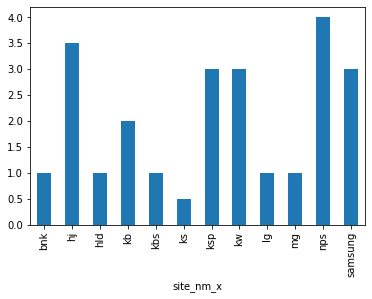

In [33]:

df_grp_site.plot(kind='bar') # graph kind bar | hist | scatter